In [10]:
pkg load statistics

# 1.5)

## Question
13. In many pattern classiﬁcation problems one has the option either to assign the
pattern to one of c classes, or to reject it as being unrecognizable. If the cost for
rejects is not too high, rejection may be a desirable action. Let
\begin{equation}
\lambda(\alpha_i | \omega_j) = 
\begin{cases}
    0 & i=j \\
    \lambda_r & i = c+1 \\
    \lambda_s & otherwise \\
\end{cases}
\end{equation}
where $\lambda_r$ is the loss incurred for choosing the (c + 1)th action, rejection, and $\lambda_s$ is the loss incurred for making a substitution error. Show that the minimum risk is obtained if we decide $\omega_i$ if $P(\omega_i | x) \ge P(\omega_j | x)$ for all j and if $P(\omega_i | x) \gt 1- \frac{\lambda_r}{\lambda_s}$, and reject otherwise.  What happens if $\lambda_r = 0$? What happens if $\lambda_r \gt \lambda_s$?

## Answer

$$R(\alpha_i|x) = P(\omega_i | x)*0 + P_{\omega (c+1)}\lambda_r + P(\omega_{\ne i} | x)\lambda_s$$

To minimize this risk, it m

If $\lambda_r = 0$, it costs nothing to classify an example as being unrecognizable.  An optimal solution for the problem is to then just classify every example as unrecognizable, incurring a cost, $\lambda$ of 0.  
If $\lambda_r \gt \lambda_s$, then it is less costly to missclassify an example then to mark it as unrecognizable.  The optimal solution is then to never use the option to classify something as unrecognizable.

To minimize this risk for a given maximum confidence $C = P(\omega_i | x)$ (i is the most likely class), we must then minimize
$$P(\omega_{c+1} | x)\lambda_r + P(\omega_{\ne i} | x)\lambda_s$$
$P_(\omega_{c+1}|x) + P(\omega_{\ne i} | x) = 1 - C$, so for fixed C, these two terms vary inversely.  The optimal combination then occurs when $\frac{P(\omega_{c+1} | x)}{P(\omega_{\ne i} | x)} = \frac{\lambda_s}{\lambda_r}$

# 1.6)

$P(x_i | \omega_i) \sim N(\mu, \sigma)$

Generates samples all from one class, chooses class randomly.  Prior is $P(x \in \mu_2)$

In [11]:
function [samples, classes] = generateGaussianSamples(mu1, mu2, sigma1, sigma2, nSamples, prior)
    gen1 = mvnrnd(mu1, sigma1, nSamples);
    gen2 = mvnrnd(mu2, sigma2, nSamples);
    classes = rand(nSamples, 1) < prior;
    samples = gen1 .* !classes + gen2 .* classes;
end

In [57]:
function [samples, classes] = plot_results(mu1, mu2, sigma1, sigma2, nSamples, prior)
    [samples, classes] = generateGaussianSamples(mu1, mu2, sigma1, sigma2, nSamples, prior);
    % Colormap from solarized colors for fun
    c = [38 139 210; 133 153 0] / 256;
    figure
    colormap(c)
    scatter(samples(:,1), samples(:,2), 200, classes + 1, '.')
    xlabel('N(\mu_1, \sigma_1)'),
    ylabel('N(\mu_2, \sigma_2)')
end

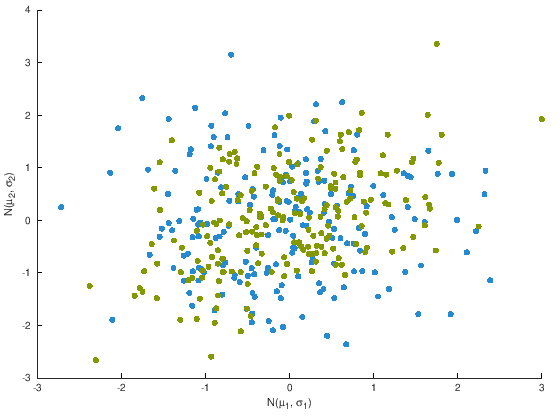

In [61]:
mu1 = mu2 = [0; 0];
sigma1 = [1 0; 0 1];
sigma2 = [1 0.5; 0.5 1];
plot_results(mu1, mu2, sigma1, sigma2, 400, 0.5);

## a)

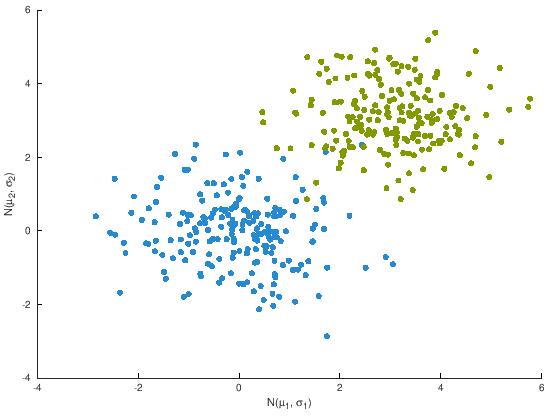

In [59]:
mua1 = [0; 0];
mua2 = [3; 3];
sigmaa1 = sigmaa2 = eye(2);
[smpa clsa] = plot_results(mua1, mua2, sigmaa1, sigmaa2, 400, 0.5);

## b)

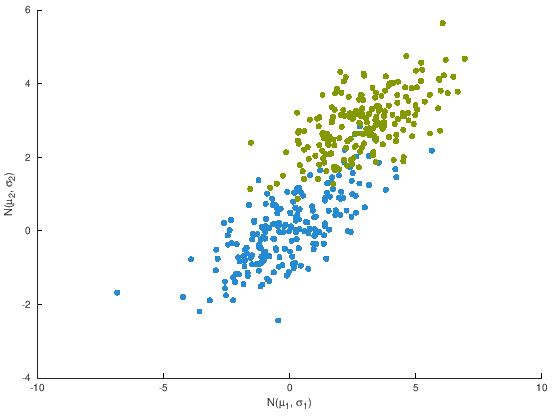

In [14]:
mub1 = [0; 0];
mub2 = [3; 3];
sigmab1 = sigmab2 = [3 1; 1 0.8];
[smpb clsb] = plot_results(mub1, mub2, sigmab1, sigmab2, 400, 0.5);

## c)

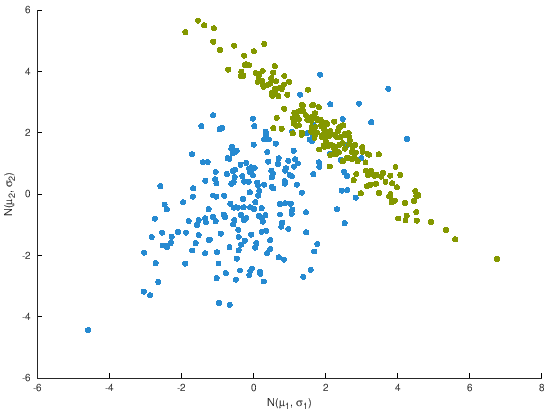

In [15]:
muc1 = [0; 0];
muc2 = [2; 2];
sigmac1 = [2 0.5; 0.5 2];
sigmac2 = [2 -1.9; -1.9 2];
[smpc clsc] = plot_results(muc1, muc2, sigmac1, sigmac2, 400, 0.5);

## d)

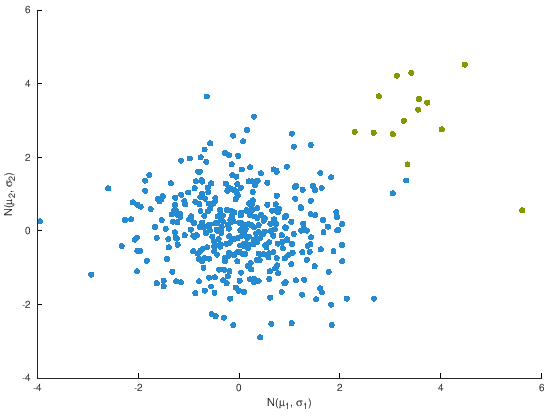

In [16]:
mud1 = [0; 0];
mud2 = [3; 3];
sigmad1 = sigmad2 = eye(2);
[smpd clsd] = plot_results(mud1, mud2, sigmad1, sigmad2, 400, 0.05);

## e)

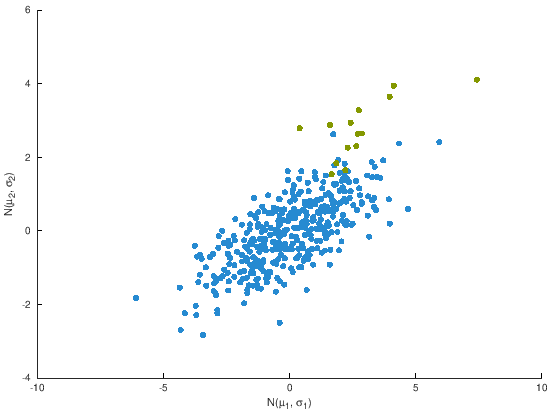

In [28]:
mue1 = [0; 0];
mue2 = [3; 3];
sigmae1 = sigmae2 = [3 1; 1 0.8];
[smpe clse] = plot_results(mue1, mue2, sigmae1, sigmae2, 400, 0.05);

# 1.7)

In [29]:
function preds = bayes_unit_cov(mu1, mu2, samples, prior)
    p1 = mvnpdf(samples, mu1, eye(2)) * (1-prior);
    p2 = mvnpdf(samples, mu2, eye(2)) * prior;
    preds = [p1 p2];
end

In [30]:
function preds = bayes_shared_cov(mu1, mu2, sigma, samples, prior)
    p1 = mvnpdf(samples, mu1, sigma) * (1-prior);
    p2 = mvnpdf(samples, mu2, sigma) * prior;
    preds = [p1 p2];
end

In [31]:
function preds = gen_bayes(mu1, mu2, sigma1, sigma2, samples, prior)
    p1 = mvnpdf(samples, mu1, sigma1) * (1-prior);
    p2 = mvnpdf(samples, mu2, sigma2) * prior;
    preds = [p1 p];
end

In [22]:
function acc = accuracy(probs, answers)
    preds = (probs(:,1) < probs(:,2));
    acc = sum(preds == answers) / length(answers);
end

In [23]:
function plot_w_color(samples, predclasses, classes)
    pctacc = accuracy(predclasses, classes) * 100
    [~, predcls] = max(predclasses, [], 2);
    % Colormap from solarized colors for fun
    c = [38 139 210; 133 153 0] / 256;
    figure
    colormap(c)
    scatter(samples(:,1), samples(:,2), 200, classes + 1, '.')
    title([num2str(pctacc) "% accurate predictions"])
    xlabel('N(\mu_1, \sigma_1)')
    ylabel('N(\mu_2, \sigma_2)')
end

## a)

pctacc =  97.750


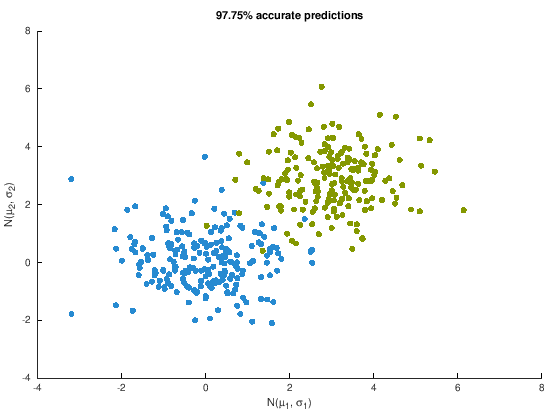

In [24]:
preds = bayes_unit_cov(mua1, mua2, smpa, 0.5);
plot_w_color(smpa, preds, clsa)

## b)
preds = bayes_unit_cov(mu

pctacc =  89.500


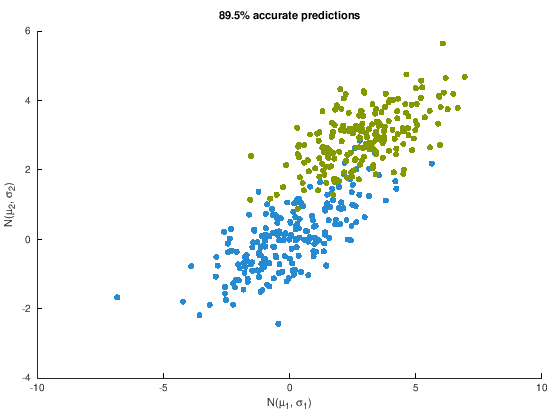

In [25]:
preds = bayes_unit_cov(mub1, mub2, smpb, 0.5);
plot_w_color(smpb, preds, clsb)